In [11]:
def plot(true_values, predicted_values):
    """Plot true vs predicted counts and loss."""
   

    fig = plt.figure()
    plt.scatter(true_values, predicted_values)

    plt.title('Train')
    plt.xlabel('True value')
    plt.ylabel('Predicted value')
    plt.show()
    

In [18]:
from lbt.search.backbone import model_search
from base import gpu_test


device = gpu_test.get_device()
device.type


criterion = torch.nn.MSELoss()
criterion = criterion.cuda()

model = model_search.Network(input_c = 3, c = 24, num_classes = 1, criterion = criterion, depth = 3, device = device)

optimizer = torch.optim.SGD(
      model.parameters(),
      0.025,
      momentum=0.9,
      weight_decay=3e-4)

Using device: cuda

GeForce RTX 3070
Memory Usage:
Allocated: 0.9 GB
Cached:    3.4 GB


0


<ipython-input-19-81c27499dc53>:35: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model.parameters(), 5)


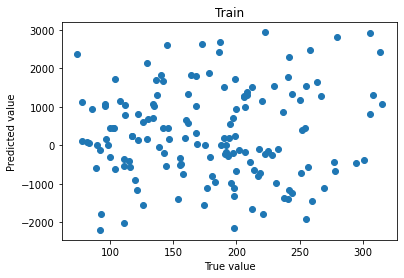

5.43105936050415
1


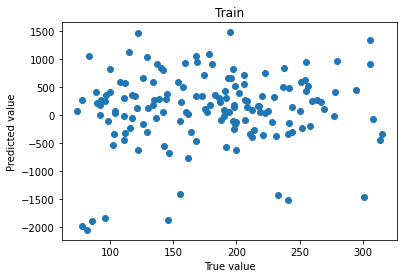

3.527904510498047
2


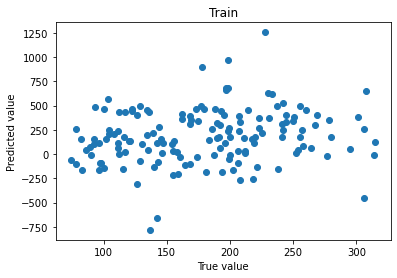

1.9972012042999268
3


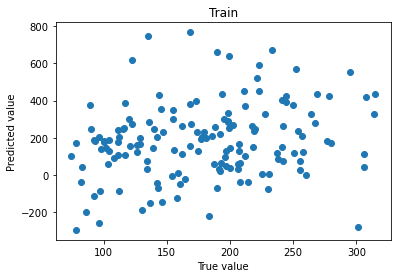

1.3981117010116577
4


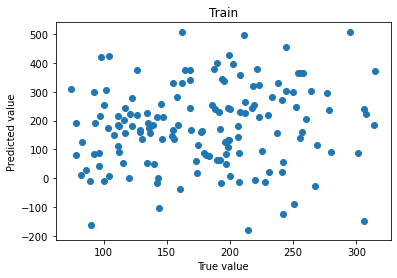

1.3975872993469238
5


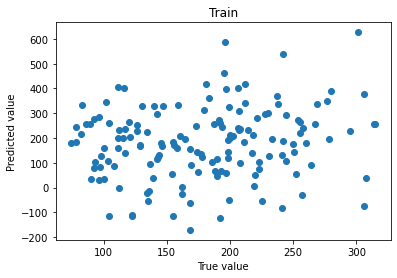

1.3546392917633057
6


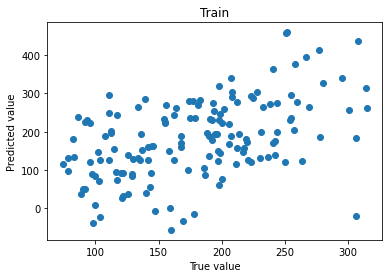

1.2491018772125244
7


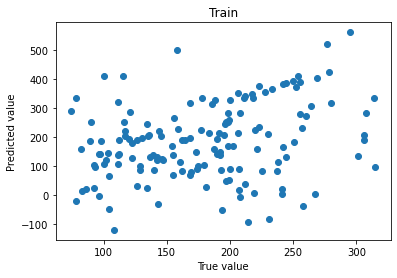

1.1517119407653809
8


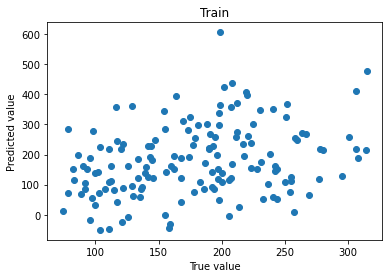

1.0939524173736572
9


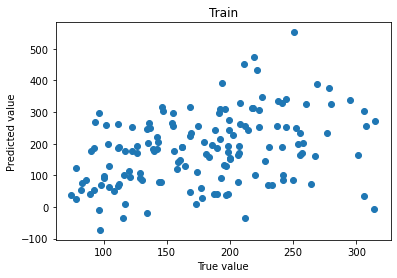

1.0274686813354492
10


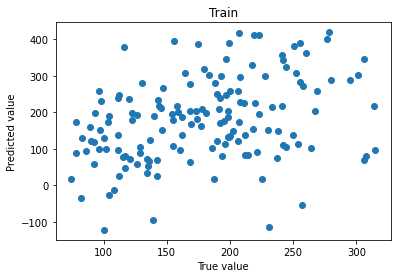

1.1328001022338867
11


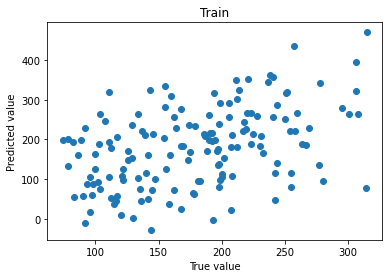

0.9162940979003906
12


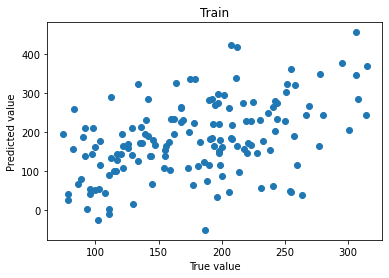

0.8552618622779846
13


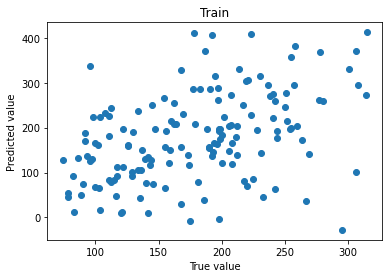

0.7960408926010132
14


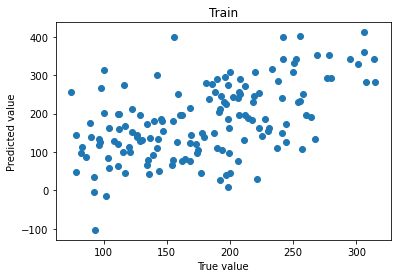

0.7807326316833496
15


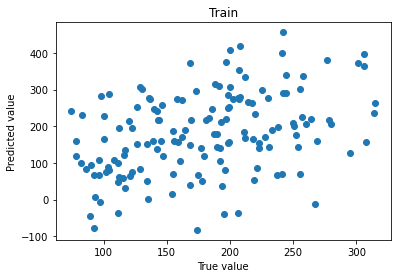

0.8660986423492432
16


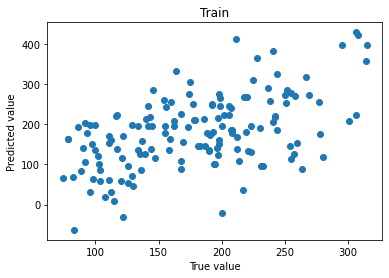

0.7626760601997375
17


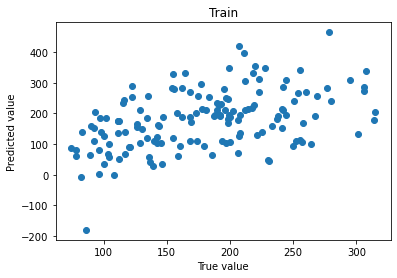

0.619184136390686
18


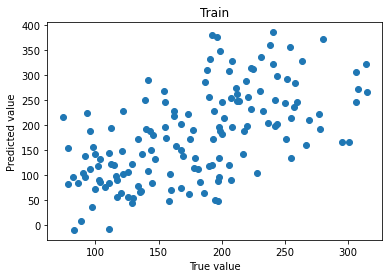

0.5946680307388306
19


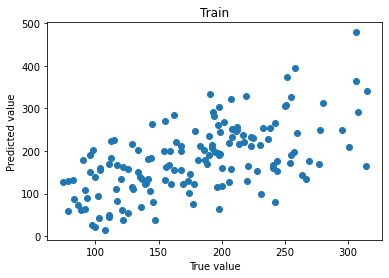

0.5322727560997009
20


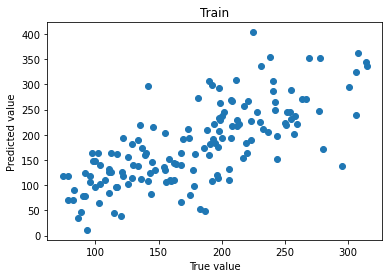

0.5425741672515869
21


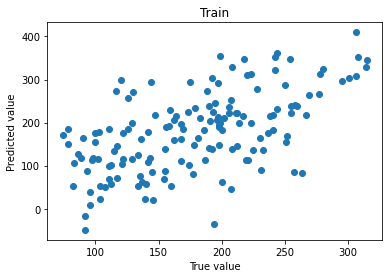

0.4362074136734009
22


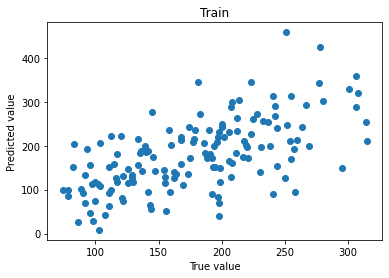

0.42578306794166565
23


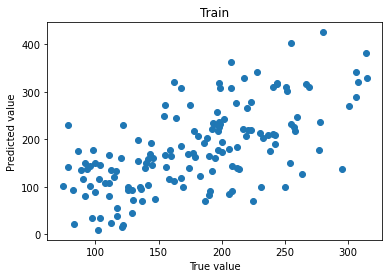

0.4035295844078064
24


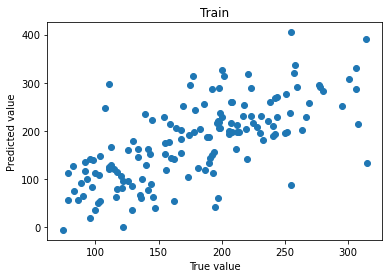

0.43918272852897644
25


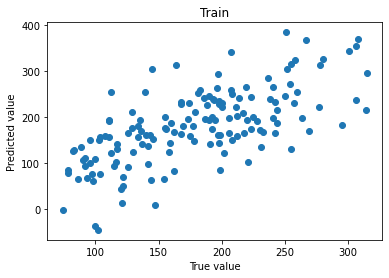

0.38442182540893555
26


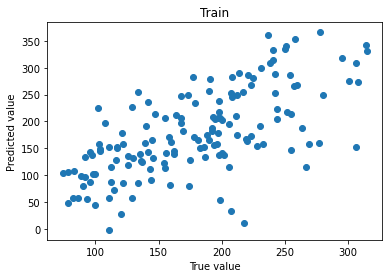

0.3629215955734253
27


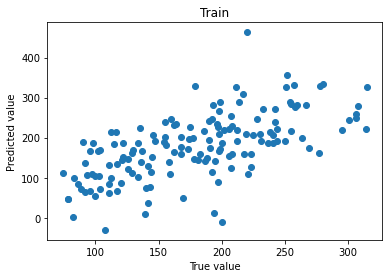

0.2949892282485962
28


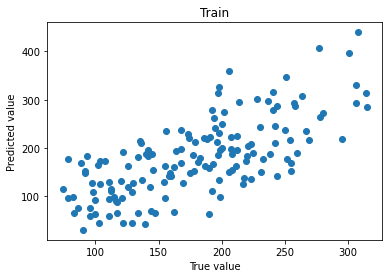

0.32091981172561646
29


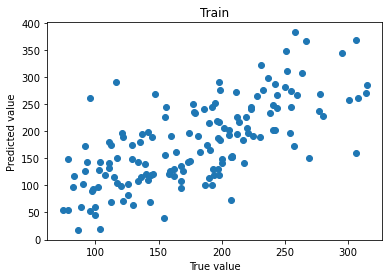

0.4500223696231842
30


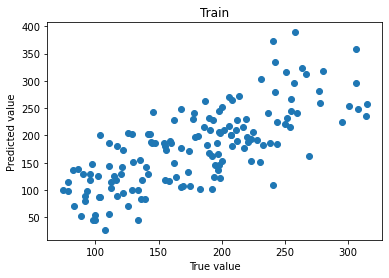

0.2939794659614563
31


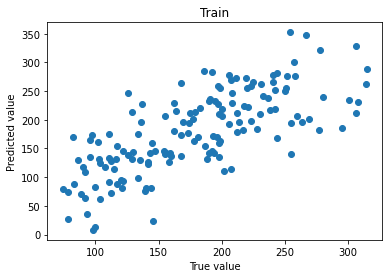

0.22213034331798553
32


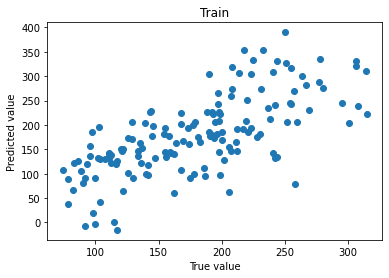

0.276683509349823
33


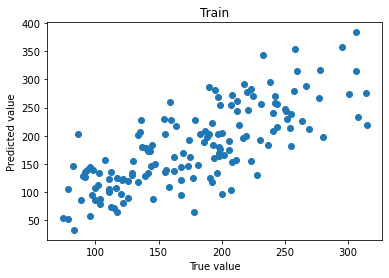

0.21987168490886688
34


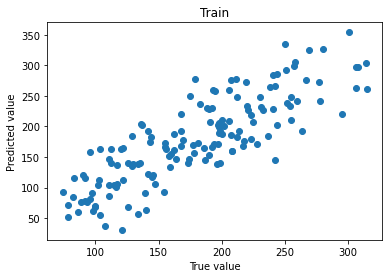

0.15598608553409576
35


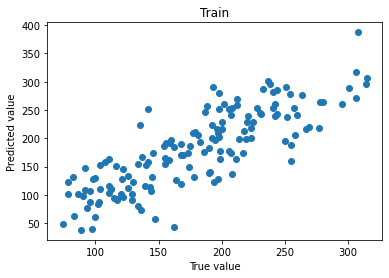

0.16134116053581238
36


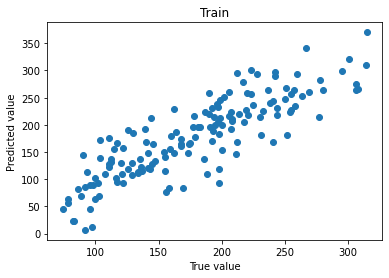

0.11830180138349533
37


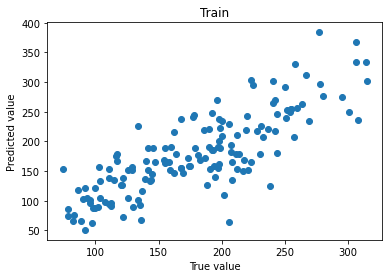

0.2344822883605957
38


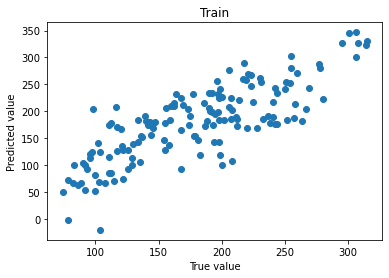

0.08990656584501266
39


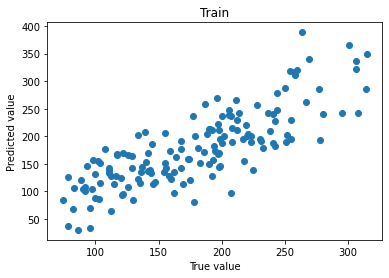

0.0982387587428093
40


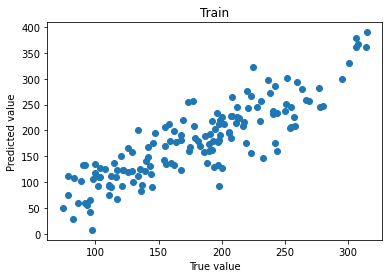

0.07960312068462372
41


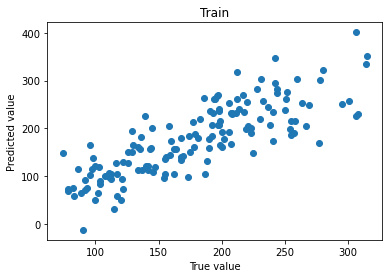

0.12668193876743317
42


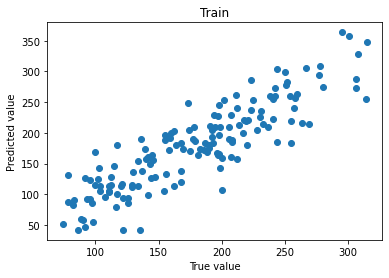

0.08216103911399841
43


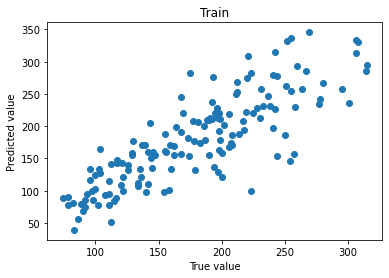

0.07807546854019165
44


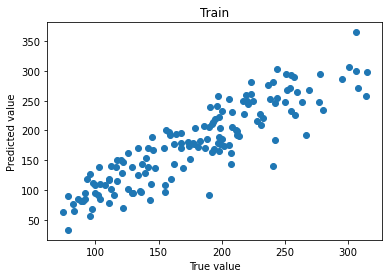

0.08340668678283691
45


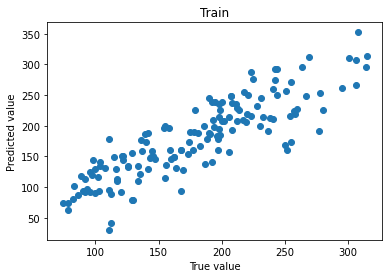

0.0811157375574112
46


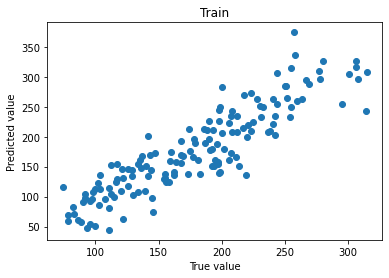

0.07356743514537811
47


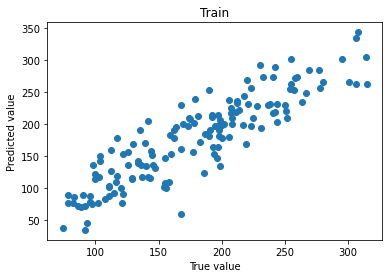

0.07203240692615509
48


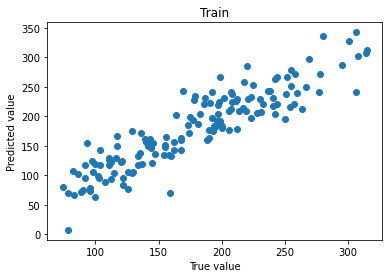

0.08010149747133255
49


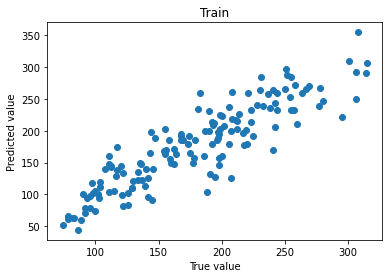

0.07632526755332947


In [19]:
from base import data_loader
from base import train
from torch.autograd import Variable


data_loader = train.get_loader('cell', batch_size=1)

train_queue = data_loader['train']
test_queue = data_loader['valid']
model = model.cuda()

epochs = 50

scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, float(epochs))

for epoch in range(epochs):
    
    true_values = []
    predicted_values = []
    
    print(epoch)
    model.train()
    for image, label in tqdm(train_queue):
        image = image.cuda()
        label = label.cuda()

        optimizer.zero_grad()
        
        logits = model(image)
        loss = criterion(logits, label)
        
        
        
        loss.backward()
        torch.nn.utils.clip_grad_norm(model.parameters(), 5)
        optimizer.step()
        
        for true, predicted in zip(label, logits):

                true_counts = torch.sum(true).item() / 100
                predicted_counts = torch.sum(predicted).item() / 100

                # update current epoch results
                true_values.append(true_counts)
                predicted_values.append(predicted_counts)
                
    plot(true_values, predicted_values)
                
    print(loss.item())
        
    scheduler.step()

In [5]:
import torch
torch.cuda.empty_cache()
